# Ejercicios Pair Programming 
## Lección 3 - Tratamiento para ML de Covarianza y Correlación

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [1]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Establecer tamaño gráficas
plt.rcParams["figure.figsize"] = (15,15)

# Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("supermercado_limpio.csv", index_col=0)

In [3]:
df.head()

,id,year_birth,education,marital_status,income,dt_customer,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
0,1826,1970,Graduation,Divorced,84835.0,6/16/2014,1,4,6,1
1,1,1961,Graduation,Single,57091.0,6/15/2014,1,7,7,5
2,10476,1958,Graduation,Married,67267.0,5/13/2014,1,3,5,2
3,1386,1967,Graduation,Together,32474.0,11/5/2014,1,1,2,7
4,5371,1989,Graduation,Single,21474.0,8/4/2014,2,3,2,7


1.- Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza indica si ambas variables van en la misma dirección y la correlación aparte de lo que indica la covarianza también la fuerza de la relación, es decir, como están de correlacionadas dichas variables.

2.- Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

#### Analíticamente correlación

In [4]:
# Utilizamos el parametro .corr para ver la correlación de Pearson.
df.corr()

,id,year_birth,income,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
id,1.000000,0.007097,0.003756,-0.039894,-0.022925,-0.010541,-0.007458
year_birth,0.007097,1.000000,-0.211185,-0.073426,-0.160004,-0.140854,0.121232
income,0.003756,-0.211185,1.000000,-0.133933,0.530235,0.690648,-0.654353
numdealspurchases,-0.039894,-0.073426,-0.133933,1.000000,0.276862,0.070083,0.361608
numwebpurchases,-0.022925,-0.160004,0.530235,0.276862,1.000000,0.553461,-0.043326
numstorepurchases,-0.010541,-0.140854,0.690648,0.070083,0.553461,1.000000,-0.455857
numwebvisitsmonth,-0.007458,0.121232,-0.654353,0.361608,-0.043326,-0.455857,1.000000


De forma analítica vemos la correlación de nuestras variables del dataset. En este caso, los valores de las correlaciones nos aparecen en una tabla que apreciamos a simple vista y en la que nos cuesta más interpretar los resultados al tener muchas columnas en nuestro dataframe, por lo que haremos el análisis en base a la gráfica de heatmap que tendremos más adelante.

#### Analíticamente covarianza

In [5]:
df.cov()

,id,year_birth,income,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
id,1.055017e+07,269.746616,2.517569e+05,-244.316668,-195.655334,-110.846275,-58.357989
year_birth,2.697466e+02,136.948944,-5.100627e+04,-1.620100,-4.919906,-5.336704,3.417615
income,2.517569e+05,-51006.266465,4.259521e+08,-5211.747162,28753.862093,46148.960516,-32532.657165
numdealspurchases,-2.443167e+02,-1.620100,-5.211747e+03,3.554911,1.371594,0.427809,1.642402
numwebpurchases,-1.956553e+02,-4.919906,2.875386e+04,1.371594,6.903916,4.708251,-0.274234
numstorepurchases,-1.108463e+02,-5.336704,4.614896e+04,0.427809,4.708251,10.482124,-3.555331
numwebvisitsmonth,-5.835799e+01,3.417615,-3.253266e+04,1.642402,-0.274234,-3.555331,5.803020


Aquí vemos de forma analítica la covarianza y podemos apreciar que en la relación de "numwebpurchases" y "numdealspurchases"  el valor es "1.37", por lo tanto, es una covarianza positiva, es decir, si aumentan las ofertas en web también aumentan las compras online.

Por otro lado, en la relación "numwebpurchases" y "year_birth" visualizamos que es una covarianza negativa, es decir, cuanto mayor eres (tu año de nacimiento es inferior) más compras online haces.

3.- Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

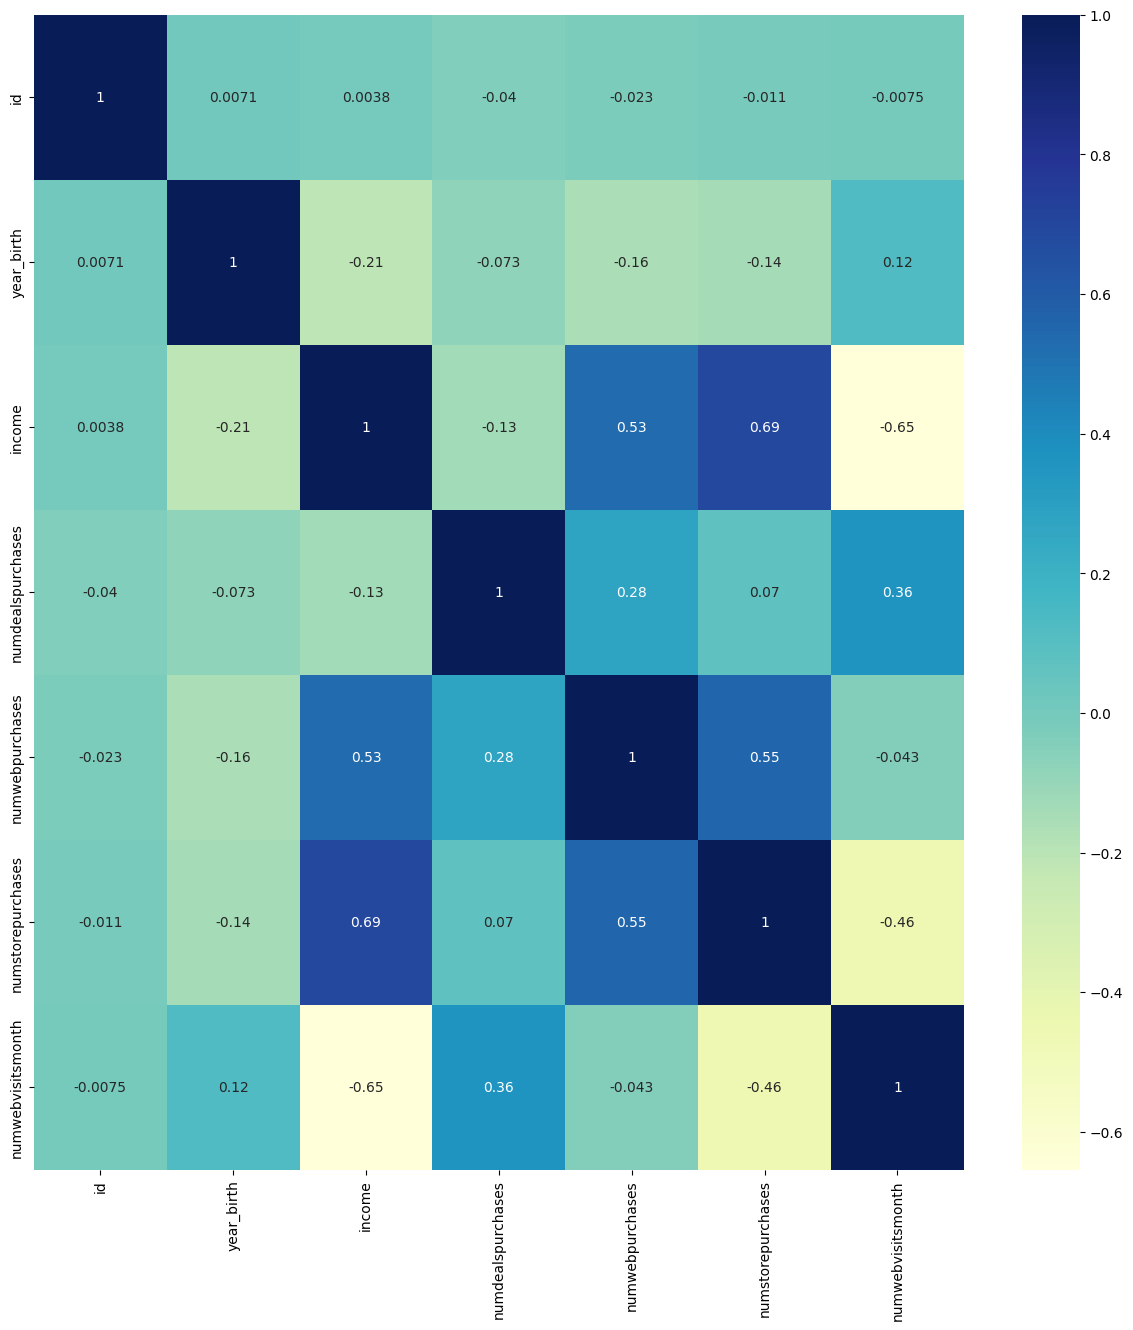

In [6]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True)
plt.savefig("./Gráficos/heatmap_supermercados.png");

Podemos ver aquí la correlación entre nuestras variables numéricas. Si vemos la relación entre "numwebpurchases vs income" vemos que nos presenta el valor de 0.53, eso quiere decir que es una correlación positiva moderada, es decir, a más ingresos más compras por web. En el caso de "numwebpurchases vs numwebvisitsmonth" vemos que presenta un valor de -0.043, eso quiere decir que es una correlacion negativa muy baja, es decir, un aumento del número de visitas no implica un aumento de compras online.

4.- Guardad la gráfica del heatmap.

La gráfica del heatmap la hemos añadido a una nueva carpeta llamada "Gráficos" donde la encontraréis.

Happy coding💪🏽